## Problem Statement: 
Finding the best airfare has been desired by everyone but not always available to all. In this project we will try to predict the best airfare based on historical data.

## Data Understanding
To understand the pattern of air fare, we have a dataset derived from publicly available sources provided by the US Department of Transportation Bureau of Transportation Statistics (BTS). It combines and processes data from two major sources — the DB1B and T-100 datasets. Along with cleaned BTS data, the dataset features additional variables that help explain fare differences across markets, such as competition intensity, circuity and existence of multiple airports within the origin, destination, or both.

## Objectives
Understand the relationship between various features and average airfare.
Build and evaluate multiple regression models to predict the best average airfare.
Provide actionable insights based on model findings.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the dataset
df = pd.read_csv('data/MarketFarePredictionData.csv')
df.head()

MktCoupons  OriginCityMarketID  DestCityMarketID  OriginAirportID  \
0           2                 178               152              170   
1           2                 178               152              170   
2           2                 178               152              170   
3           2                 178               152              170   
4           2                 178               152              170   

   DestAirportID  Carrier  NonStopMiles  RoundTrip  ODPairID    Pax  ...  \
0            255        6        1807.0        1.0      4035  136.0  ...   
1            194       20        1798.0        1.0      4035  136.0  ...   
2            260        6        1784.0        0.0      4035  136.0  ...   
3            255        6        1807.0        1.0      4035  136.0  ...   
4            194       20        1798.0        1.0      4035  136.0  ...   

   Circuity  Slot  Non_Stop  MktMilesFlown  OriginCityMarketID_freq  \
0  1.367460     0       0.0    1992.449761                 0.004138   
1  1.051724     0       0.0    1992.449761                 0.004138   
2  1.034753     0       0.0    1992.449761                 0.004138   
3  1.029884     0       0.0    1992.449761                 0.004138   
4  1.062291     0       0.0    1992.449761                 0.004138   

   DestCityMarketID_freq  OriginAirportID_freq  DestAirportID_freq  \
0               0.039783              0.004138            0.022049   
1               0.039783              0.004138            0.008368   
2               0.039783              0.004138            0.009366   
3               0.039783              0.004138            0.022049   
4               0.039783              0.004138            0.008368   

   Carrier_freq  ODPairID_freq  
0      0.116826       0.000132  
1      0.307651       0.000132  
2      0.116826       0.000132  
3      0.116826       0.000132  
4      0.307651       0.000132  

[5 rows x 26 columns]

## Exploratory Data Analysis (EDA)

In [8]:
# Display basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581278 entries, 0 to 1581277
Data columns (total 26 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   MktCoupons               1581278 non-null  int64  
 1   OriginCityMarketID       1581278 non-null  int64  
 2   DestCityMarketID         1581278 non-null  int64  
 3   OriginAirportID          1581278 non-null  int64  
 4   DestAirportID            1581278 non-null  int64  
 5   Carrier                  1581278 non-null  int64  
 6   NonStopMiles             1581278 non-null  float64
 7   RoundTrip                1581278 non-null  float64
 8   ODPairID                 1581278 non-null  int64  
 9   Pax                      1581278 non-null  float64
 10  CarrierPax               1581278 non-null  float64
 11  Average_Fare             1581278 non-null  float64
 12  Market_share             1581278 non-null  float64
 13  Market_HHI               1581278 non-null 

In [10]:
# Display descriptive statistics
df.describe()

MktCoupons  OriginCityMarketID  DestCityMarketID  OriginAirportID  \
count  1.581278e+06        1.581278e+06      1.581278e+06     1.581278e+06   
mean   1.179463e+00        1.081836e+02      1.088161e+02     1.483760e+02   
std    3.876878e-01        6.779829e+01      6.824662e+01     7.974261e+01   
min    1.000000e+00        0.000000e+00      0.000000e+00     0.000000e+00   
25%    1.000000e+00        4.800000e+01      4.800000e+01     7.300000e+01   
50%    1.000000e+00        1.070000e+02      1.080000e+02     1.500000e+02   
75%    1.000000e+00        1.580000e+02      1.590000e+02     2.130000e+02   
max    3.000000e+00        2.660000e+02      2.670000e+02     2.900000e+02   

       DestAirportID       Carrier  NonStopMiles     RoundTrip      ODPairID  \
count   1.581278e+06  1.581278e+06  1.581278e+06  1.581278e+06  1.581278e+06   
mean    1.492537e+02  1.277755e+01  1.183158e+03  8.052215e-01  2.488494e+03   
std     8.006476e+01  7.785476e+00  7.136535e+02  3.960302e-01  1.401771e+03   
min     0.000000e+00  0.000000e+00  1.000000e+02  0.000000e+00  0.000000e+00   
25%     7.400000e+01  4.000000e+00  6.430000e+02  1.000000e+00  1.349000e+03   
50%     1.510000e+02  1.500000e+01  1.011000e+03  1.000000e+00  2.598000e+03   
75%     2.140000e+02  2.000000e+01  1.590000e+03  1.000000e+00  3.493000e+03   
max     2.910000e+02  2.400000e+01  5.095000e+03  1.000000e+00  5.354000e+03   

                Pax  ...      Circuity          Slot      Non_Stop  \
count  1.581278e+06  ...  1.581278e+06  1.581278e+06  1.581278e+06   
mean   1.773202e+05  ...  1.026428e+00  1.213386e-01  8.220598e-01   
std    2.380289e+05  ...  1.091917e-01  3.265204e-01  3.824626e-01   
min    1.000000e+00  ...  1.000000e+00  0.000000e+00  0.000000e+00   
25%    3.182400e+04  ...  1.000000e+00  0.000000e+00  1.000000e+00   
50%    8.654300e+04  ...  1.000000e+00  0.000000e+00  1.000000e+00   
75%    2.318210e+05  ...  1.000000e+00  0.000000e+00  1.000000e+00   
max    1.495396e+06  ...  2.985825e+00  1.000000e+00  1.000000e+00   

       MktMilesFlown  OriginCityMarketID_freq  DestCityMarketID_freq  \
count   1.581278e+06             1.581278e+06           1.581278e+06   
mean    1.213717e+03             2.654614e-02           2.652975e-02   
std     7.268271e+02             1.934480e-02           1.924849e-02   
min     1.020000e+02             4.426799e-06           2.529599e-06   
25%     6.580258e+02             1.037452e-02           1.050922e-02   
50%     1.040641e+03             2.645202e-02           2.620602e-02   
75%     1.639106e+03             3.978681e-02           3.978301e-02   
max     5.096521e+03             6.692372e-02           6.629195e-02   

       OriginAirportID_freq  DestAirportID_freq  Carrier_freq  ODPairID_freq  
count          1.581278e+06        1.581278e+06  1.581278e+06   1.581278e+06  
mean           1.657893e-02        1.658640e-02  1.527605e-01   7.775990e-04  
std            1.008668e-02        1.007899e-02  1.119035e-01   9.117999e-04  
min            4.426799e-06        2.529599e-06  3.958823e-04   6.323999e-07  
25%            8.544355e-03        8.631626e-03  5.086329e-02   2.093244e-04  
50%            1.636777e-02        1.672128e-02  1.168264e-01   4.648139e-04  
75%            2.324512e-02        2.335263e-02  3.076512e-01   1.035239e-03  
max            3.630165e-02        3.597090e-02  3.076512e-01   5.302673e-03  

[8 rows x 26 columns]

In [10]:
# Check for missing values
df.isnull().sum()

MktCoupons                 0
OriginCityMarketID         0
DestCityMarketID           0
OriginAirportID            0
DestAirportID              0
Carrier                    0
NonStopMiles               0
RoundTrip                  0
ODPairID                   0
Pax                        0
CarrierPax                 0
Average_Fare               0
Market_share               0
Market_HHI                 0
LCC_Comp                   0
Multi_Airport              0
Circuity                   0
Slot                       0
Non_Stop                   0
MktMilesFlown              0
OriginCityMarketID_freq    0
DestCityMarketID_freq      0
OriginAirportID_freq       0
DestAirportID_freq         0
Carrier_freq               0
ODPairID_freq              0
dtype: int64

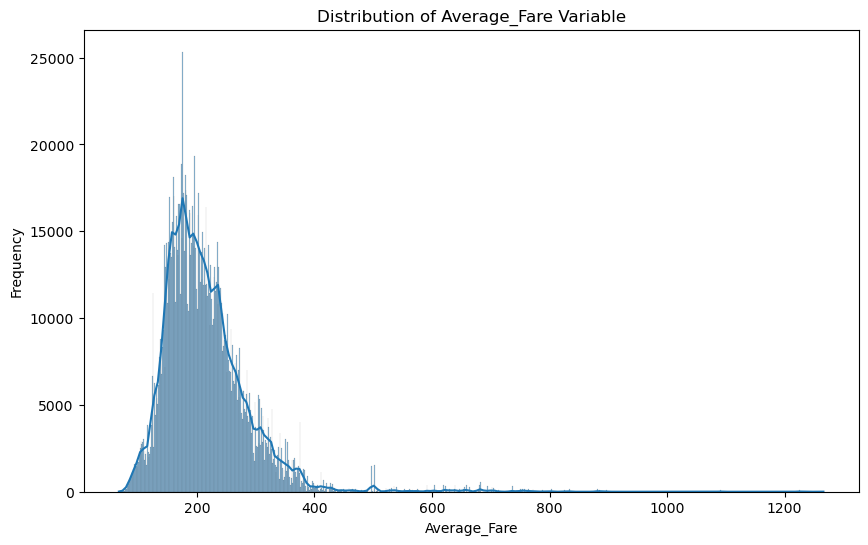

In [12]:
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Average_Fare'], kde=True)
plt.title('Distribution of Average_Fare Variable')
plt.xlabel('Average_Fare')
plt.ylabel('Frequency')
plt.show()
     


## Limit the data set for a specific route.

In [14]:
# Count occurrences of combinations in 'OriginCityMarketID' and 'DestCityMarketID'
counts = df[['OriginCityMarketID', 'DestCityMarketID']].value_counts()
print(counts)

OriginCityMarketID  DestCityMarketID
109                 159                 8385
158                 110                 8264
109                 153                 7516
152                 110                 7414
151                 159                 5415
                                        ... 
171                 77                     1
158                 54                     1
92                  80                     1
76                  164                    1
                    172                    1
Name: count, Length: 5354, dtype: int64


In [16]:
#Lets create a new data frame for a route having maximum records.
route_df=df[(df['OriginCityMarketID'] == 109) & (df['DestCityMarketID'] == 159)]
route_df.head()

MktCoupons  OriginCityMarketID  DestCityMarketID  OriginAirportID  \
232486           1                 109               159              143   
232487           1                 109               159               89   
232488           1                 109               159              143   
232489           2                 109               159               89   
232490           2                 109               159               89   

        DestAirportID  Carrier  NonStopMiles  RoundTrip  ODPairID       Pax  \
232486            151        2        2475.0        1.0      2697  771024.0   
232487            151        4        2454.0        0.0      2697  771024.0   
232488            151        6        2475.0        1.0      2697  771024.0   
232489            200        6        2409.0        1.0      2697  771024.0   
232490            151        2        2454.0        0.0      2697  771024.0   

        ...  Circuity  Slot  Non_Stop  MktMilesFlown  OriginCityMarketID_freq  \
232486  ...  1.000000     1       1.0    2507.854502                 0.066924   
232487  ...  1.000000     0       1.0    2507.854502                 0.066924   
232488  ...  1.000000     1       1.0    2507.854502                 0.066924   
232489  ...  1.048983     0       0.0    2507.854502                 0.066924   
232490  ...  1.081500     0       0.0    2507.854502                 0.066924   

        DestCityMarketID_freq  OriginAirportID_freq  DestAirportID_freq  \
232486               0.059483              0.020614            0.035971   
232487               0.059483              0.022847            0.035971   
232488               0.059483              0.020614            0.035971   
232489               0.059483              0.022847            0.006459   
232490               0.059483              0.022847            0.035971   

        Carrier_freq  ODPairID_freq  
232486      0.153893       0.005303  
232487      0.050863       0.005303  
232488      0.116826       0.005303  
232489      0.116826       0.005303  
232490      0.153893       0.005303  

[5 rows x 26 columns]

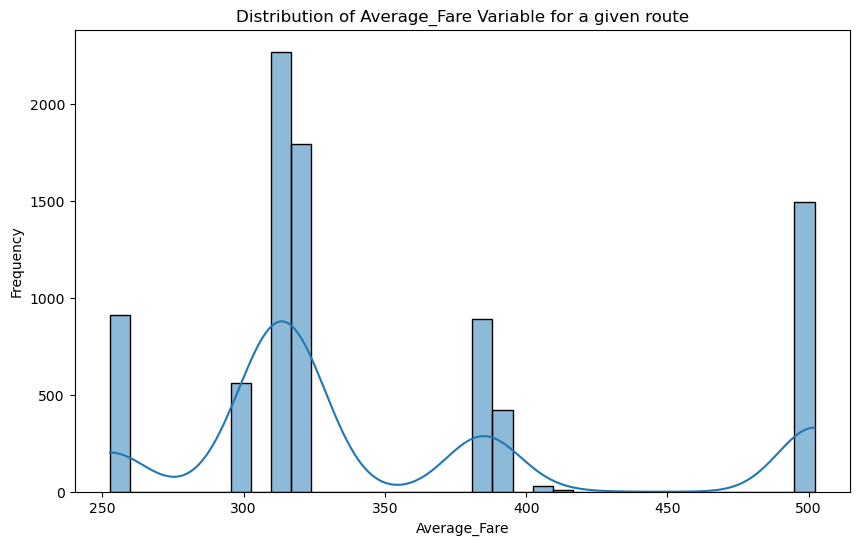

In [77]:
# Visualize the distribution of the target variable (Average_Fare) on a route specific data
plt.figure(figsize=(10, 6))
sns.histplot(route_df['Average_Fare'], kde=True)
plt.title('Distribution of Average_Fare Variable for a given route')
plt.xlabel('Average_Fare')
plt.ylabel('Frequency')
plt.show()

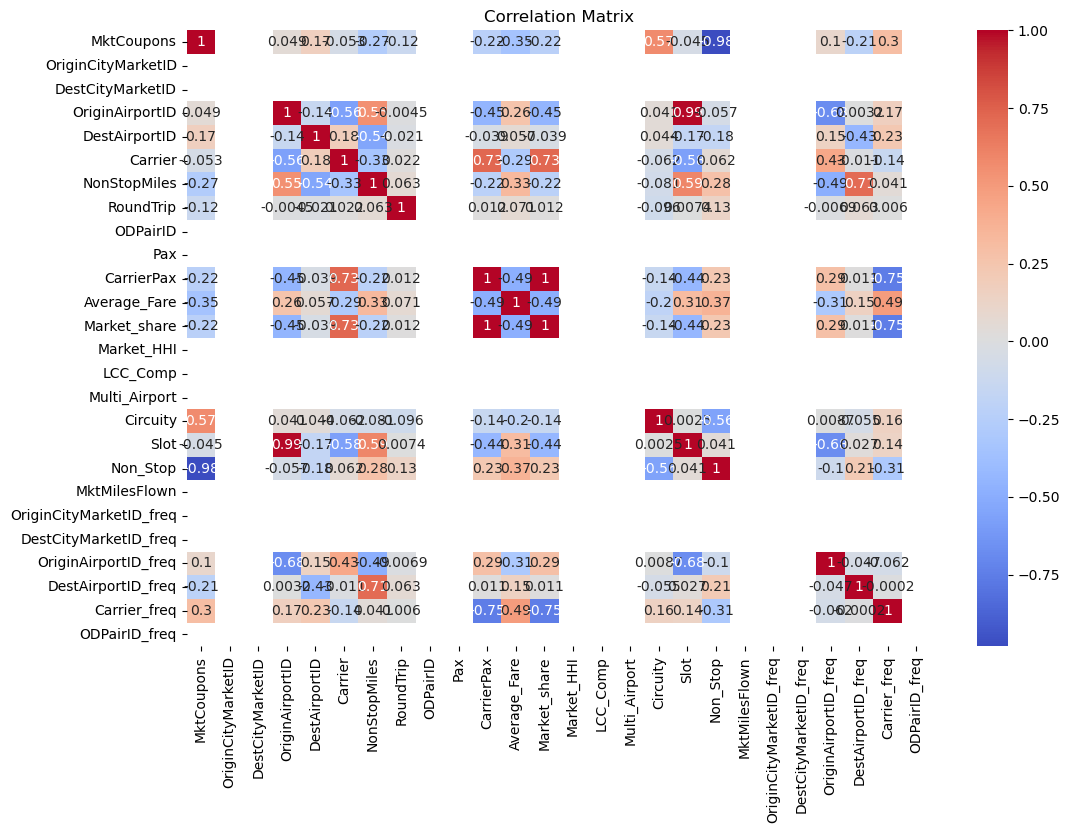

In [20]:
# Visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(route_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Lets have a little better visulization by ignoring columns having no corelation data

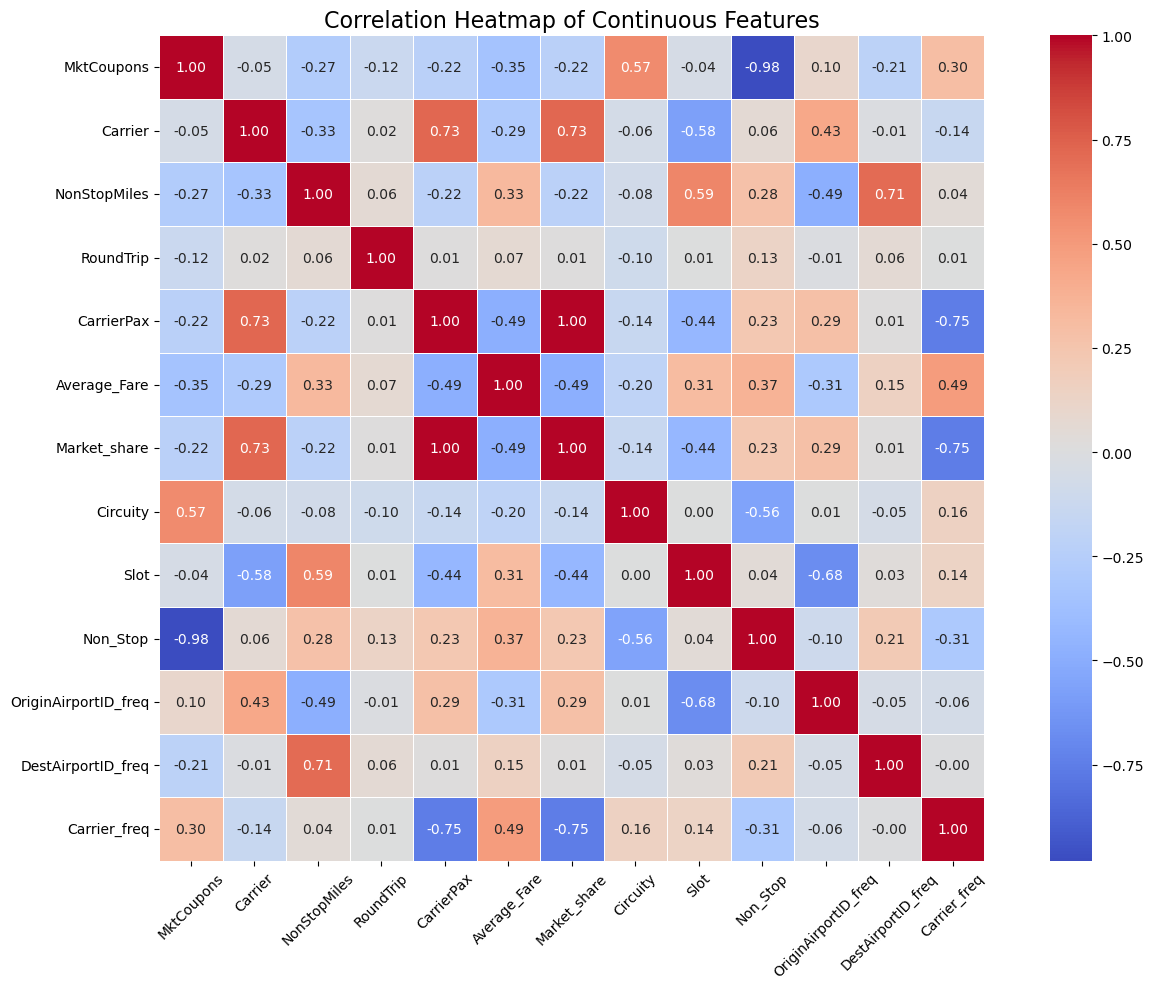

In [82]:
# --- Correlation Heatmap of Continuous Features ---
# Select only continuous numeric columns (excluding IDs, categorical flags, etc.)
continuous_cols = [
    'MktCoupons', 'Carrier', 'NonStopMiles', 'RoundTrip', 'CarrierPax', 'Average_Fare', 'Market_share', 'Circuity', 'Slot', 'Non_Stop',
    'OriginAirportID_freq', 'DestAirportID_freq', 'Carrier_freq'
]

plt.figure(figsize=(14, 10))
corr_matrix = route_df[continuous_cols].corr()

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of Continuous Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Data cleaning
No data cleaning is required.

## Split dataset into train, test
Spliting a route specific data to 80:20.


In [29]:
X = route_df.drop('Average_Fare', axis=1)
y = route_df['Average_Fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Elastic Net Regression': ElasticNet(),
}

In [33]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: RMSE = 46.6616, R2 = 0.6413
Ridge Regression: RMSE = 49.0683, R2 = 0.6034
Lasso Regression: RMSE = 53.0239, R2 = 0.5368
Elastic Net Regression: RMSE = 57.5196, R2 = 0.4550


**Linear Regression** has the best performance among the four models with the lowest RMSE and the highest R2 value. It is the most suitable model for this dataset based on the given metrics.

**RMSE (Root Mean Squared Error) = 46.6616:** This value indicates the average error in the predictions. In this context, it means that on average, the model's predictions are off by about 46.66 units from the actual values of average fare.

**R2 (R-squared) = 0.6413:** This value indicates that approximately 64.13% of the variance in the target variable (average fare) is explained by the features in the model. While this is a moderate level of explanation, it also indicates that there is still a significant amount of unexplained variance, suggesting room for model improvement.

## Cross Validation and Hyperparameter Tuning

In [57]:
# Define the parameter grid for Ridge, Lasso, and Elastic Net
param_grid = {
    'Ridge': {'alpha': [0.1, 1.0, 10.0, 100.0]},
    'Lasso': {'alpha': [0.01, 0.1, 1.0, 10.0]},
    'ElasticNet': {'alpha': [0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
}

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=5000),
    'ElasticNet': ElasticNet()
}

# Perform cross-validation and hyperparameter tuning
best_models = {}
for name, model in models.items():
    if name in param_grid:
        grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
        grid.fit(X_train, y_train)
        best_models[name] = grid.best_estimator_
        best_rmse = np.sqrt(-grid.best_score_)
        print(f"Best {name}: {grid.best_params_}, RMSE = {best_rmse:.4f}")
    else:
        # For Linear Regression, just perform cross-validation
        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-scores)  # Convert negative MSE to RMSE
        best_models[name] = model
        print(f"{name}: Cross-validation RMSE = {rmse_scores.mean():.4f}")

print()
print('Evaluate the best models on the test set')
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    print(f"{name}: RMSE = {rmse:.4f}, R2 = {r2:.4f}")

Linear Regression: Cross-validation RMSE = 45.9758
Best Ridge: {'alpha': 0.1}, RMSE = 46.5438
Best Lasso: {'alpha': 0.01}, RMSE = 46.5173
Best ElasticNet: {'alpha': 0.01, 'l1_ratio': 0.9}, RMSE = 50.1153

Evaluate the best models on the test set
Linear Regression: RMSE = 46.6616, R2 = 0.6413
Ridge: RMSE = 47.4259, R2 = 0.6295
Lasso: RMSE = 47.4295, R2 = 0.6294
ElasticNet: RMSE = 51.3711, R2 = 0.5653


**The performance remains unchanged** as expected since Linear Regression does not have hyperparameters to tune. It serves as a baseline for comparison.

Based on the post-tuning metrics, **Linear Regression is the best performing model** with the lowest RMSE and highest R2 score, making it the preferred choice for predicting average fare in this context.



## Linear Regression model - Final performance metrics and model interpretation

Given the results of the previous section, we'll proceed with the best Linear regression model for further analysis.


In [61]:
# Use the best Linear regression model to make predictions
best_model = best_models['Linear Regression']
y_pred = best_model.predict(X_test)

# Create a DataFrame to show actual vs. predicted values
actual_vs_predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
actual_vs_predicted_df.head()


Actual   Predicted
235351  252.69  364.587216
240663  309.95  324.235977
238419  309.95  295.902247
237343  321.58  328.206107
239346  252.69  312.536124

## Interpret the Coefficients and Y-Intercept

Linear regression provides the coefficients of the features and the intercept. These values help us understand the relationship between each feature and the target variable. However, due to the L1 regularization, some coefficients may be zero, indicating that the feature is not used in the model.

In [64]:
# Get the coefficients and the intercept from the Linear Regression model
coefficients = pd.Series(best_model.coef_, index=X_train.columns)
intercept = best_model.intercept_

print("Linear Regression Coefficients:")
print(coefficients)
print("\nIntercept:", intercept)

Linear Regression Coefficients:
MktCoupons                 6.964180e+01
OriginCityMarketID        -4.316576e-09
DestCityMarketID          -2.008527e-11
OriginAirportID           -2.824703e+00
DestAirportID              2.044552e-01
Carrier                   -5.531027e+00
NonStopMiles               4.640094e-01
RoundTrip                 -2.342537e+00
ODPairID                  -2.842171e-14
Pax                        0.000000e+00
CarrierPax                 7.438422e-04
Market_share               9.646645e-10
Market_HHI                 9.094947e-13
LCC_Comp                   0.000000e+00
Multi_Airport              0.000000e+00
Circuity                  -3.657918e+01
Slot                       1.540852e+02
Non_Stop                   1.551133e+02
MktMilesFlown             -3.942219e-20
OriginCityMarketID_freq   -2.448795e-24
DestCityMarketID_freq     -6.127415e-25
OriginAirportID_freq      -7.628059e+03
DestAirportID_freq        -7.300796e+01
Carrier_freq               1.867578e+03
ODPairID

## In general:

**Coefficient Value:** The value of each coefficient represents the expected change in the target variable for a one-unit change in the corresponding feature, assuming all other features remain constant.

**Intercept:** The intercept represents the expected value of the target variable when all features are zero.


## Plot the results

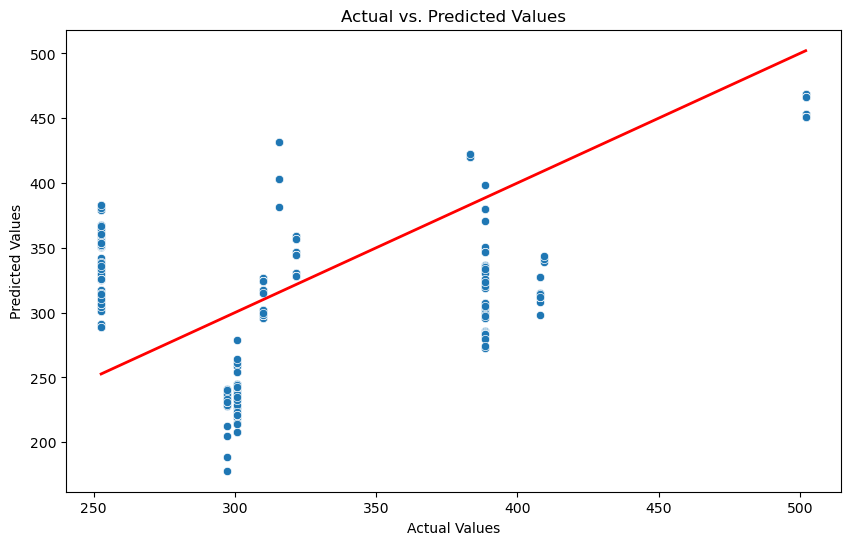

In [67]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=actual_vs_predicted_df)
plt.plot([actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         [actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
         color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

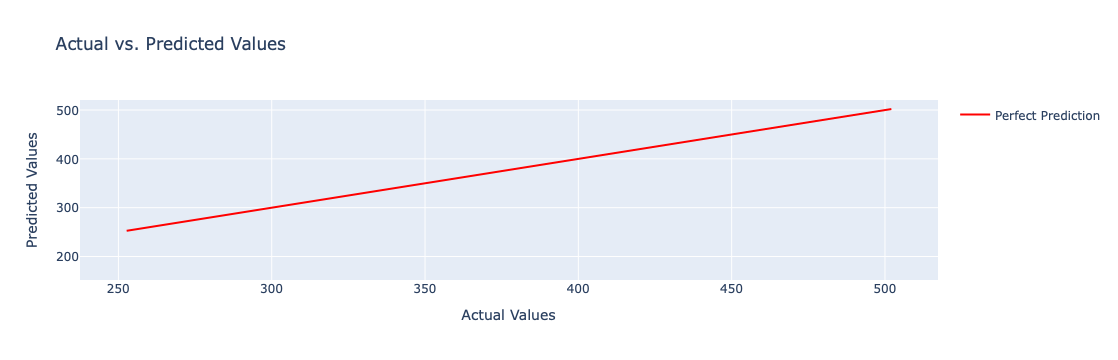

In [69]:
# Plot actual vs. predicted values

# Create scatter plot
fig = px.scatter(
    actual_vs_predicted_df,
    x='Actual',
    y='Predicted',
    title='Actual vs. Predicted Values',
    labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'}
)

# Add a line for perfect predictions
fig.add_trace(
    go.Scatter(
        x=[actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
        y=[actual_vs_predicted_df['Actual'].min(), actual_vs_predicted_df['Actual'].max()],
        mode='lines',
        name='Perfect Prediction',
        line=dict(color='red', width=2)
    )
)

# Save the plot as an HTML file
fig.write_html("actual_vs_predicted.html")

# To display the plot (optional)
fig.show()

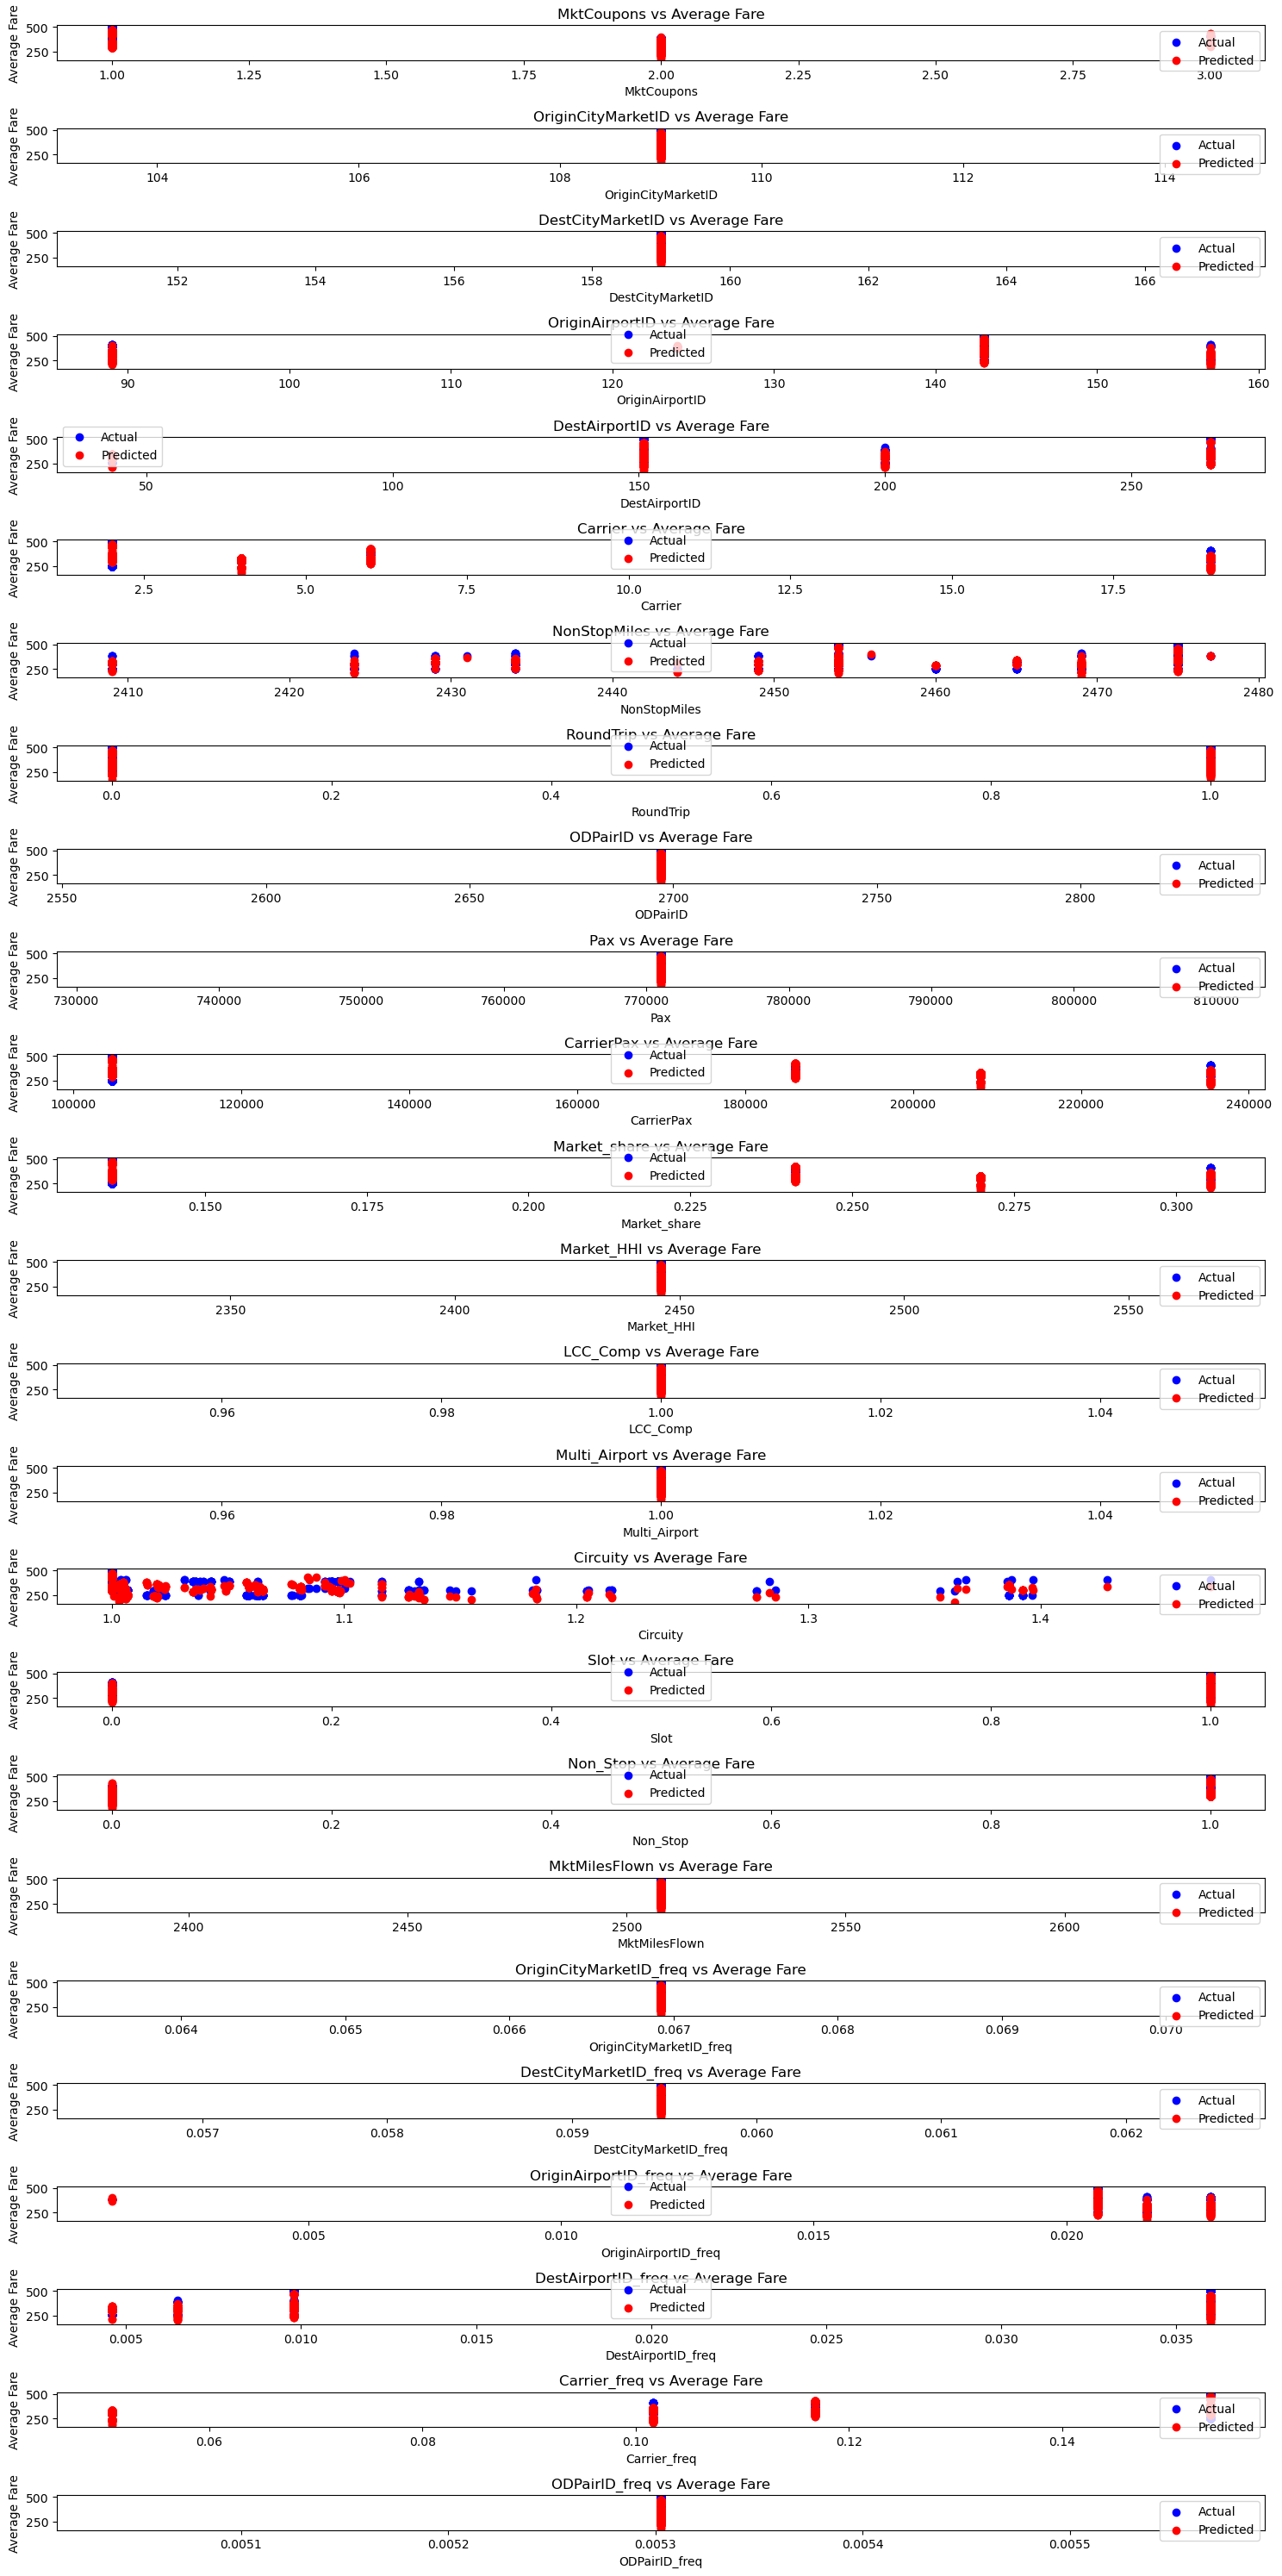

In [71]:
import matplotlib.pyplot as plt

# Get the selected features from the model
selected_features = coefficients.index

# Create scatter plots for each selected feature against the target variable
plt.figure(figsize=(15, 30))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(len(selected_features), 1, i)
    plt.scatter(X_test[feature], y_test, color='blue', label='Actual')
    plt.scatter(X_test[feature], y_pred, color='red', label='Predicted')
    plt.xlabel(f'{feature}')
    plt.ylabel('Average Fare')
    plt.title(f'{feature} vs Average Fare')
    plt.legend()

plt.tight_layout()
plt.show()


## Conclusions
**qqqq**
